# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(study_results, mouse_metadata, on= "Mouse ID")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data.loc[data.duplicated(["Mouse ID","Timepoint"])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = data[data.duplicated(["Mouse ID","Timepoint"],keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
datadd = data.drop_duplicates(subset=["Mouse ID","Timepoint"])
dataddm = datadd[~(datadd["Mouse ID"] == "g989")]
dataddm

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
dataddm.nunique()["Mouse ID"]

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = dataddm.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med = dataddm.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = dataddm.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = dataddm.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = dataddm.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()




# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


dataf = {
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":med,
    "Tumor Volume Variance":var,
    "Tumor Volume Std. Dev.":std,
    "Tumor Volume Std. Err.":sem,
}
per_drug = pd.DataFrame(dataf)
per_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
per_drug2 = dataddm.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std='std',
    sem='sem'
)
per_drug2

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
x = dataddm.groupby('Drug Regimen').size()
z = dataddm.groupby('Sex').size()

## Bar and Pie Charts

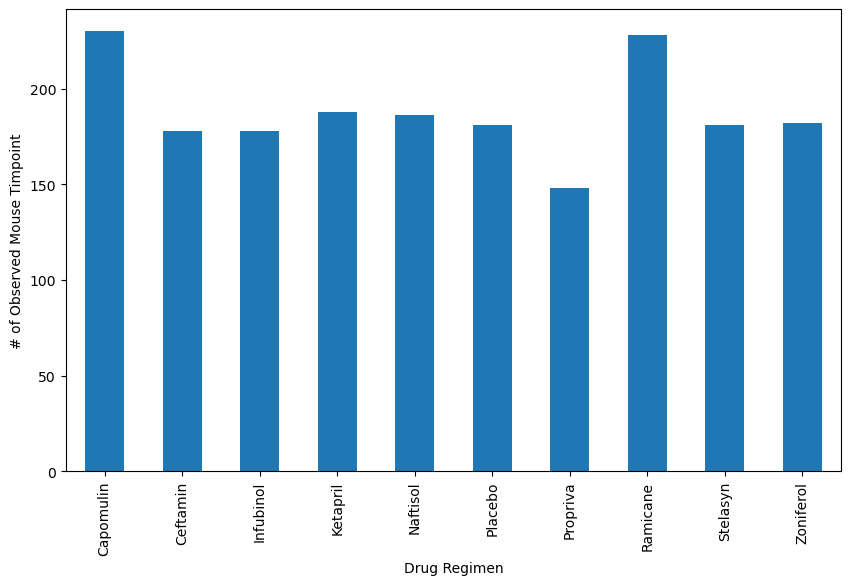

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
x.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timpoint')
plt.xticks(rotation=90)

# Display the plot
plt.show()



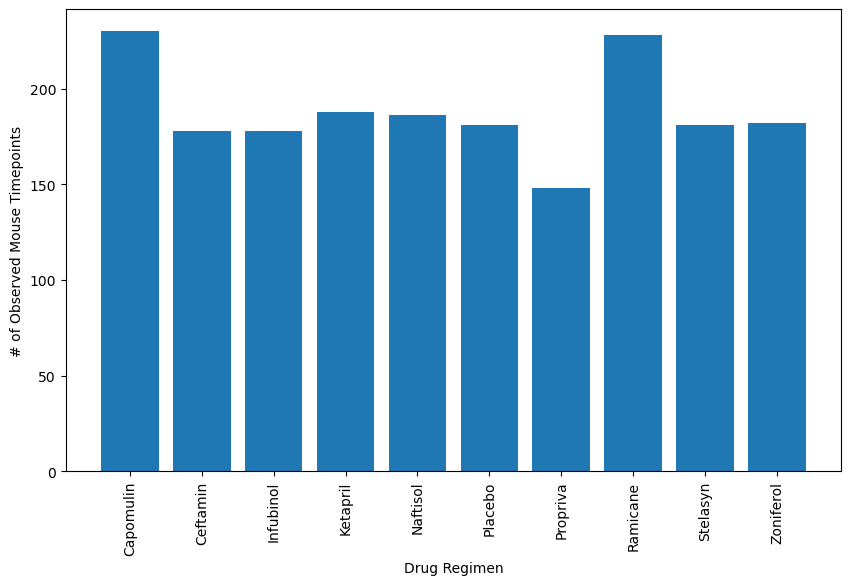

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))

# Specify the x and y values for the bar plot
x_values = x.index
y_values = x.values

# Plot the bar chart
plt.bar(x_values, y_values)

# Customize the plot
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

# Display the plot
plt.show()


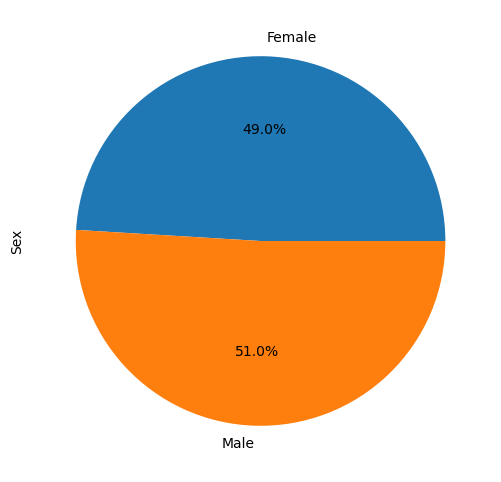

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
z.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')

# Customize the plot
plt.ylabel('Sex')

# Display the plot
plt.show()


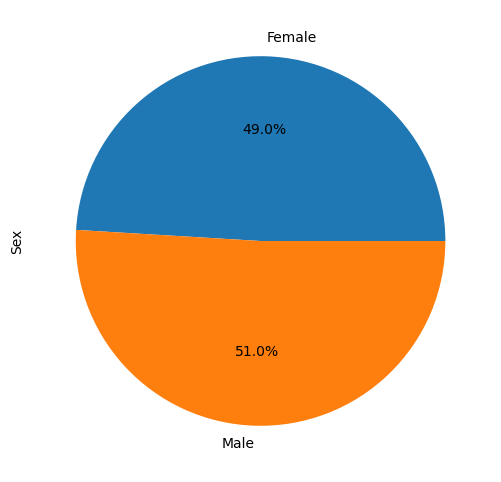

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6, 6))

# Specify the labels and values for the pie plot
labels = z.index
values = z.values

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")


# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, data, on=['Mouse ID', 'Timepoint'])


In [15]:
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
    
    
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset of tumor volumes to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR
    quartile1 = tumor_volumes.quantile(0.25)
    quartile3 = tumor_volumes.quantile(0.75)
    iqr = quartile3 - quartile1
    
    # Determine potential outliers using upper and lower bounds
    lower_bound = quartile1 - 1.5 * iqr
    upper_bound = quartile3 + 1.5 * iqr
    
    # Check for potential outliers
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"Potential outliers for {treatment}: {potential_outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


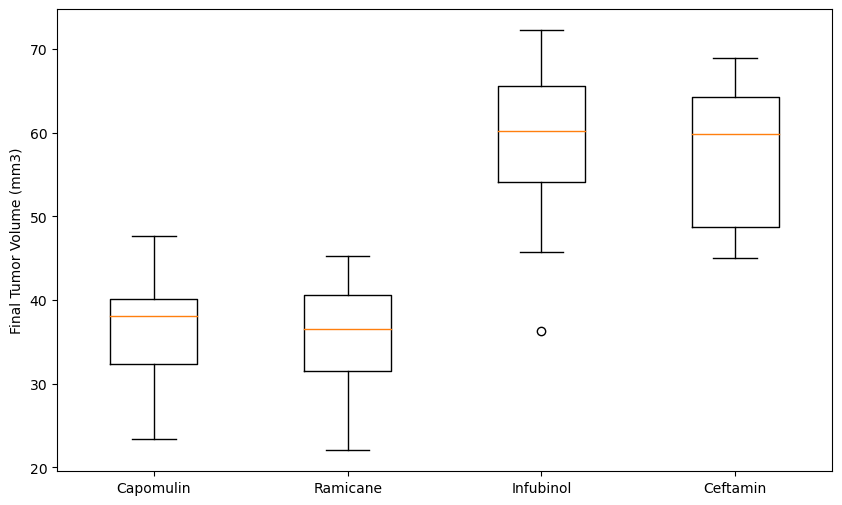

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))

# Plot the box plot
plt.boxplot(tumor_volume_data, labels=treatments)

# Customize the plot
plt.ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()


## Line and Scatter Plots

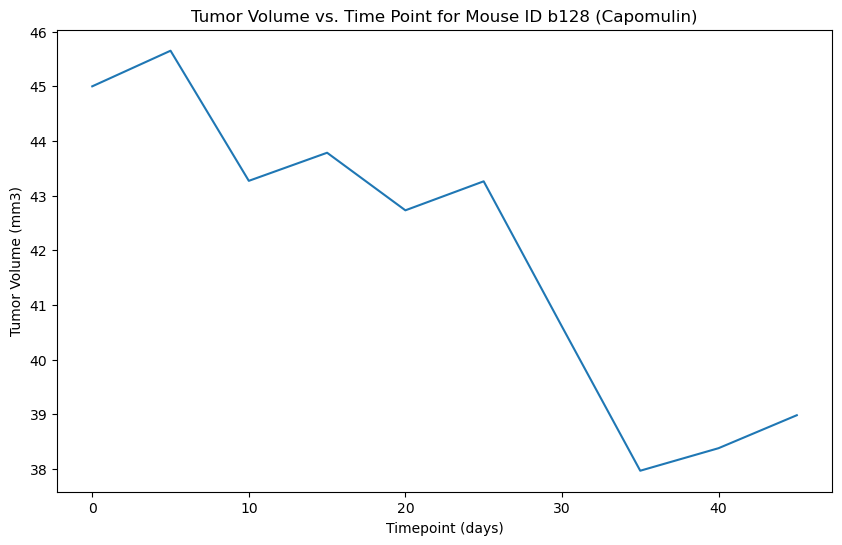

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data to include only the records for Capomulin treatment
capomulin_data = data[data['Drug Regimen'] == 'Capomulin']

# Choose the mouse ID treated with Capomulin
mouse_id ='b128'

# Filter the data for the chosen mouse ID
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Customize the plot
plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()

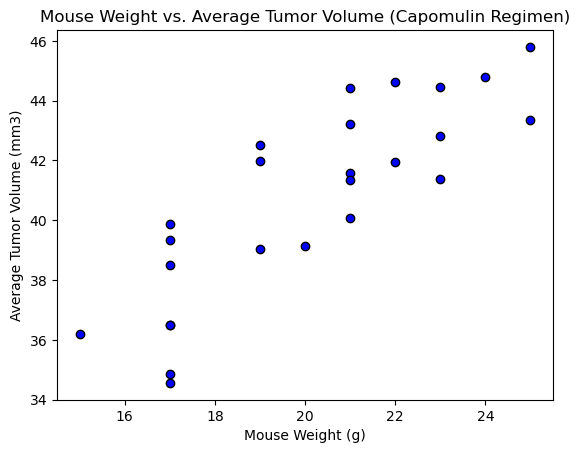

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for Capomulin treatment
capomulin_data = data[data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Retrieve the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

# Set the title and labels for the plot
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694719


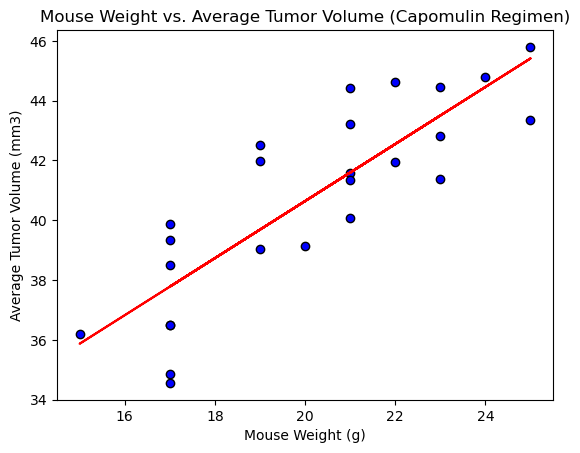

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the data for Capomulin treatment
capomulin_data = data[data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Retrieve the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)[0]
print(f"Correlation Coefficient: {correlation}")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_volume)

# Generate predicted tumor volume values based on the linear regression model
predicted_tumor_volume = slope * mouse_weight + intercept

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

# Plot the regression line
plt.plot(mouse_weight, predicted_tumor_volume, color='red')

# Set the title and labels for the plot
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()
